## Travail Pratique: Survivants du Titanic

In [3]:
import pandas as pd
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
#from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_val_score, train_test_split
#from sklearn.neural_network import MLPClassifier
#from sklearn.metrics import balanced_accuracy_score, plot_confusion_matrix, accuracy_score, recall_score,precision_score,f1_score,classification_report
from sklearn import preprocessing as pp
from sklearn.metrics import roc_curve, auc
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Données

Dans une première étape, examinons nos données.

In [7]:
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


En exécutant df.info(), nous obtiendrons une sortie affichant les informations pour le DataFrame "df". Cela peut être utile pour nous aider à décider comment nettoyer, prétraiter ou analyser les données.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#taille de la dataframe
print(df.shape)

(891, 12)


Cette ligne de code en dessous effectue une opération pour évaluer la proportion de valeurs manquantes dans chaque colonne du DataFrame "df"

In [6]:
df.isna().sum() / df.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

**D'après nos analyses, on se rend compte que pour la colonne Age il y'a 19.86% des données manquantes, 77.10% pour la colonne Cabin et enfin 0.22 pour la colonne Embarked**

In [8]:
#une description sommaire des labels les plus fréquents
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Analyses de genre

In [8]:
df.groupby(['Sex'], as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


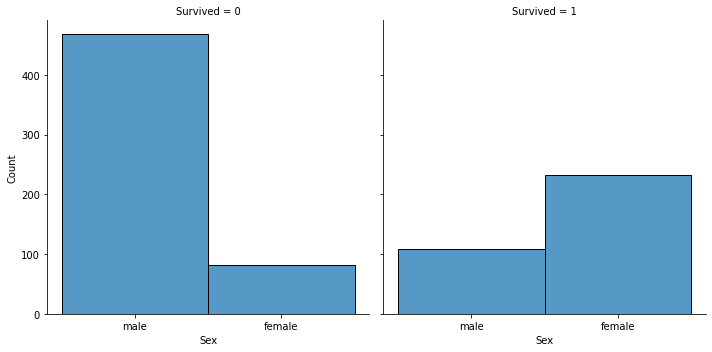

In [31]:
sns.displot(df, x='Sex', col='Survived', binwidth=6, height=5)

**74.20 de passagers féminins ont survécus**

**18.89 de passagers masculins ont survécus**

## Analyses de classe de billets

In [10]:
df.groupby(['Pclass'], as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


**Pclass 1: 62.96 des passagers ont survécus**

**Pclass 2: 47.28 des passagers ont survécus**

**Pclass 3: 24.23 des passagers ont survécus**

In [14]:
survival_par_class = df[['Pclass', 'Survived']].groupby('Pclass')['Survived'].mean()

<BarContainer object of 3 artists>

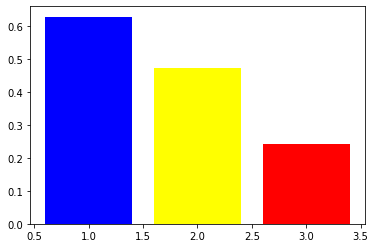

In [15]:
plt.bar(survival_par_class.index, survival_par_class, color=['blue', 'yellow','red'])

En résumé, les lignes de codes au dessus génèrent un graphique à barres montrant le taux de survie moyen pour chaque classe de billet.

## Analyses par Age

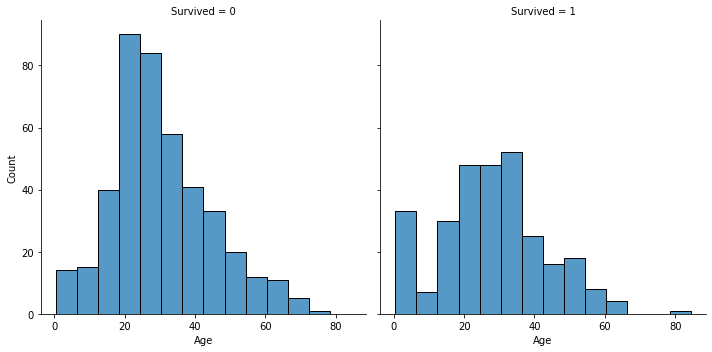

In [16]:
sns.displot(df, x='Age', col='Survived', binwidth=6, height=5)

## Analyses de taux de survie moyen par port d'embarquement

In [17]:
df.groupby(['Embarked'], as_index=False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


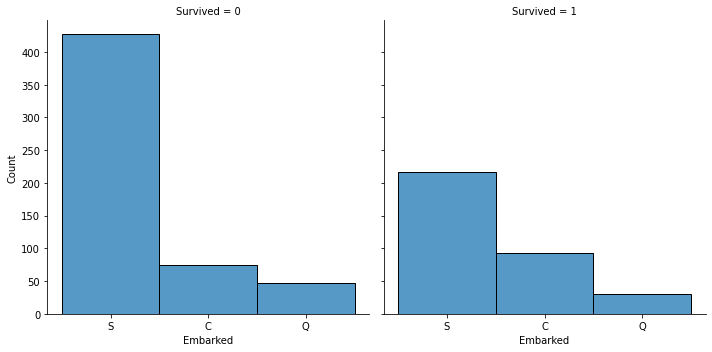

In [19]:
sns.displot(df, x='Embarked', col='Survived', binwidth=6, height=5)

## Analyses de taux de survie moyen des parents et enfants à bord

In [17]:
df.groupby(['Parch'], as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


## Analyses de taux de survie moyen par prix du billet

In [69]:
df.groupby(['Fare'], as_index=False)['Survived'].mean()

,Fare,Survived
0,0,0.066667
1,1,0.000000
2,2,0.000000
3,3,0.000000
4,4,0.000000
...,...,...
242,242,0.750000
243,243,0.500000
244,244,1.000000
245,245,0.500000


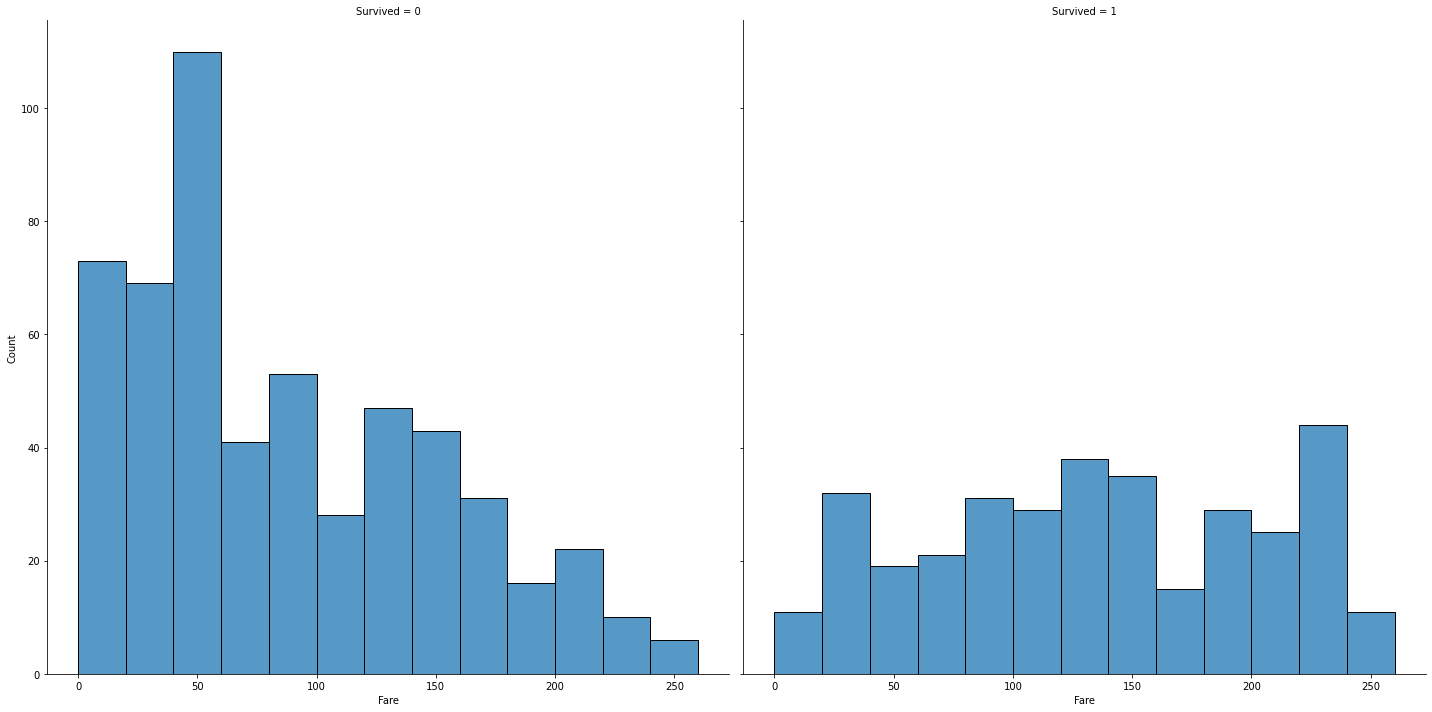

In [70]:
sns.displot(df, x='Fare', col='Survived', binwidth=20, height=10)

## Analyses de taux de survie moyen des frères/soeurs et époux à bord

In [71]:
df.groupby(['SibSp'], as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.343234
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,6,0.000000


(array([606.,   0.,   0., 209.,   0.,   0.,  28.,   0.,   0.,   0.,  16.,
          0.,   0.,  18.,   0.,   0.,   5.,   0.,   0.,   7.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. , 3.3, 3.6,
        3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. ]),
 <BarContainer object of 20 artists>)

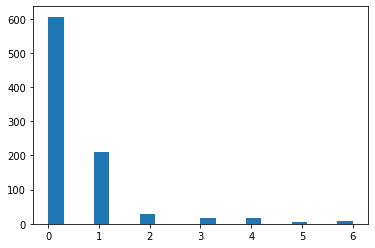

In [72]:
plt.hist(df["SibSp"], bins=20)

## Représentation graphique

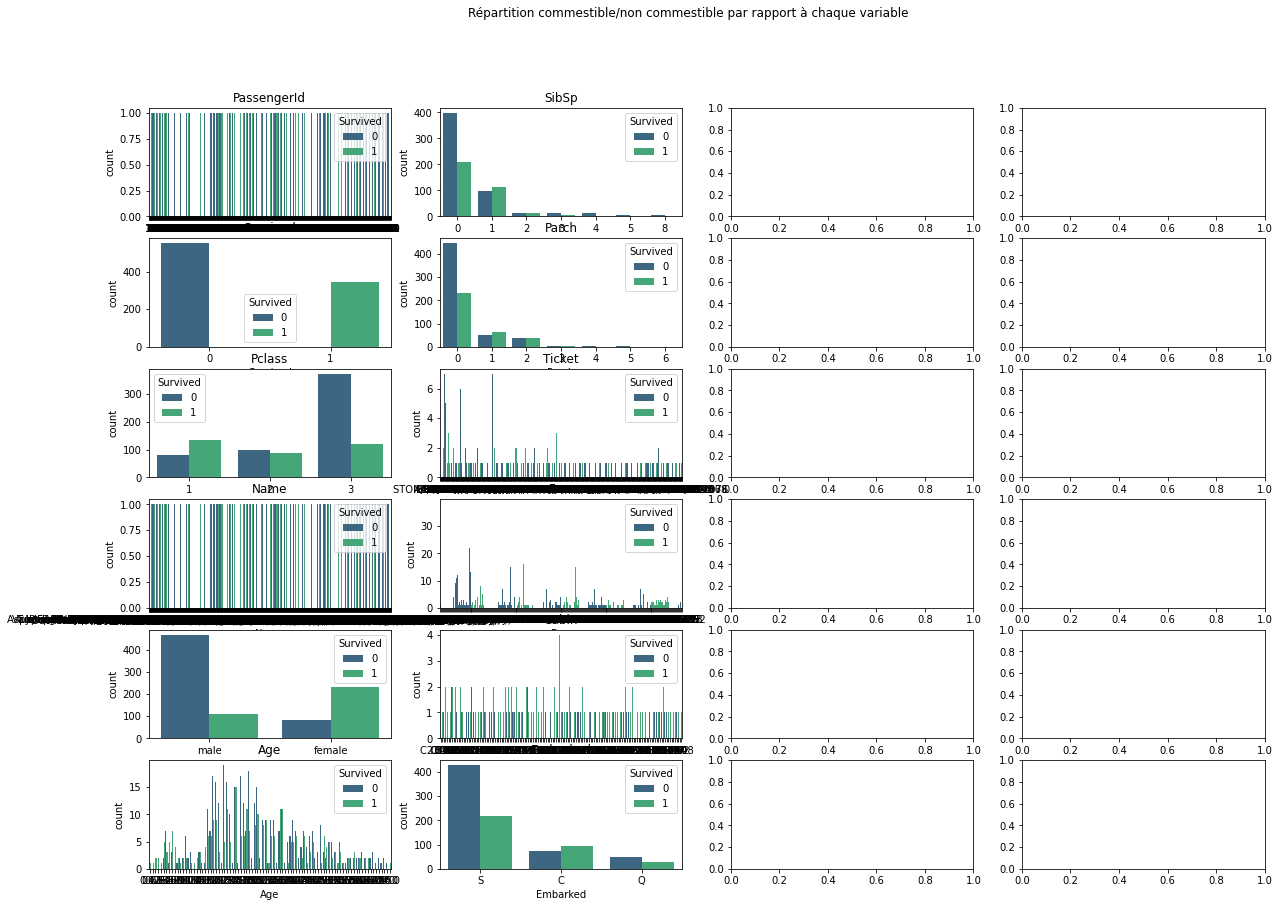

In [84]:
names=df.columns
fig, axes = plt.subplots(6, 4, figsize=(20,14))
fig.suptitle('Répartition commestible/non commestible par rapport à chaque variable')

for i in range(0,6,1):
    for j in range(0,4,1):
        if ((i + j*6)<12):
            sns.countplot(ax=axes[i, j], data=df, x=names[i+j*6], hue='Survived', palette='viridis').set(title=names[i+j*6])
        

In [22]:
caract_numériques = ['Pclass','Age','SibSp','Parch','Fare']
caract_par_catégorie = ['Cabin','Sex','Embarked']
But = 'Survived'

**Nous définissons dans le bloc de code au dessus nos variables pertinentes à utiliser dans la suite de l'étude des données et le but à atteindre.**

In [23]:
df[caract_numériques].isna().sum()

Pclass      0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64

**Cette ligne de code extrait les caractéristiques numériques définies dans la liste caract_numériques du DataFrame "df" et calcule le nombre de valeurs manquantes pour chacune de ces caractéristiques.** 

In [24]:
df[caract_par_catégorie].isna().sum()

Cabin       687
Sex           0
Embarked      2
dtype: int64

**Même raisonnement pour la ligne de code au dessus**

In [25]:
df=df.drop(columns="Cabin")
test_df=test_df.drop(columns="Cabin")
caract_numériques = ['Pclass','Age','SibSp','Parch','Fare']
caract_par_catégorie = ['Sex','Embarked']
# Replace missing values with the mean
df['Age'].fillna(df['Age'].mean(), inplace=True)
# Replace missing values with the mean
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)

# Dropping rows with NaN values in the 'Embarked' column
df.dropna(subset=['Embarked'], inplace=True)
test_df.dropna(subset=['Embarked'], inplace=True)

**Dans le bloc de code au dessus, nous effectuons plusieurs étapes de prétraitement des données:**

* En supprimant la colonne "Cabin" de nos DataFrames df et test_df

* En remplaçant les valeurs manquantes dans la colonne "Age" de df et test_df par la moyenne de l'age des passagers

* En supprimant les lignes avec des valeurs manquantes dans la colonne "Embarked" de df et test_df

In [28]:
# Description des valeurs possible par colonne
for col in df.columns:
    print(col, " : ", df[col].unique())

PassengerId  :  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 24

In [29]:
from sklearn.preprocessing import LabelEncoder
# On encode la target par LabelEncoder, car l'on ne souhaite qu'un scalaire en sortie et non un vecteur, pour les besoins des graphes
la = LabelEncoder()
for i in df.columns:
    df[i] = la.fit_transform(df[i])

In [30]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,0,2,108,1,28,1,0,522,18,2
1,1,1,0,190,0,52,1,0,595,207,0
2,2,1,2,353,0,34,0,0,668,41,2
3,3,1,0,272,0,48,1,0,48,189,2
4,4,0,2,15,1,48,0,0,471,43,2
...,...,...,...,...,...,...,...,...,...,...,...
886,884,0,1,547,1,35,0,0,100,85,2
887,885,1,0,303,0,24,0,0,14,153,2
888,886,0,2,412,0,39,1,2,674,131,2
889,887,1,0,81,1,34,0,0,8,153,0


In [31]:
cor = df.corr()
rela = cor['Survived'].sort_values(ascending = False)
rela

Survived       1.000000
Fare           0.330690
Parch          0.083151
PassengerId   -0.004997
SibSp         -0.024999
Name          -0.059075
Age           -0.067309
Ticket        -0.160931
Embarked      -0.169718
Pclass        -0.335549
Sex           -0.541585
Name: Survived, dtype: float64

In [32]:
cor

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,1.000000,-0.004997,-0.035345,-0.041267,0.043118,0.031467,-0.065403,-0.001663,-0.056888,-0.006467,0.013144
Survived,-0.004997,1.000000,-0.335549,-0.059075,-0.541585,-0.067309,-0.024999,0.083151,-0.160931,0.330690,-0.169718
Pclass,-0.035345,-0.335549,1.000000,0.054837,0.127741,-0.333182,0.076597,0.016824,0.315959,-0.722251,0.164681
Name,-0.041267,-0.059075,0.054837,1.000000,0.022087,0.054207,-0.034860,-0.048533,0.049406,-0.055858,-0.006849
Sex,0.043118,-0.541585,0.127741,0.022087,1.000000,0.083785,-0.124997,-0.247508,0.055024,-0.261615,0.110320
Age,0.031467,-0.067309,-0.333182,0.054207,0.083785,1.000000,-0.244057,-0.164081,-0.066001,0.117659,-0.025747
SibSp,-0.065403,-0.024999,0.076597,-0.034860,-0.124997,-0.244057,1.000000,0.423029,0.067632,0.372316,0.066345
Parch,-0.001663,0.083151,0.016824,-0.048533,-0.247508,-0.164081,0.423029,1.000000,0.018409,0.364430,0.040449
Ticket,-0.056888,-0.160931,0.315959,0.049406,0.055024,-0.066001,0.067632,0.018409,1.000000,-0.163641,0.000271
Fare,-0.006467,0.330690,-0.722251,-0.055858,-0.261615,0.117659,0.372316,0.364430,-0.163641,1.000000,-0.160149


### Matrice de corrélation

<Axes: >

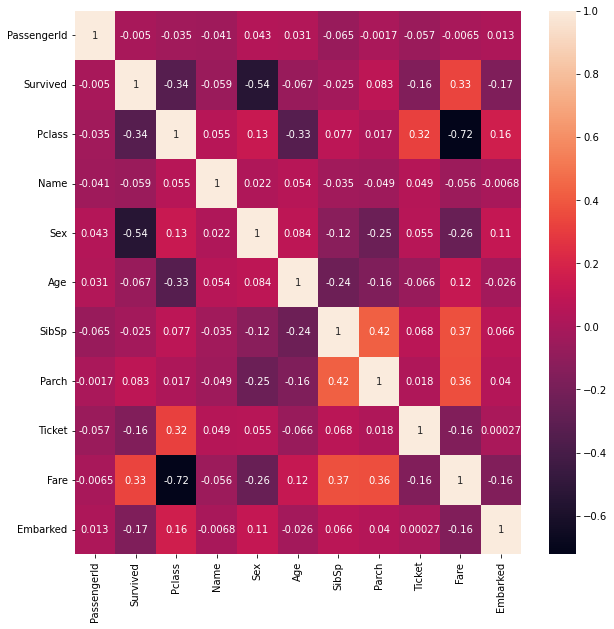

In [48]:
plt.subplots(figsize=(10, 10))
sns.heatmap(cor, annot = True)

In [38]:
Caractéristiques = caract_numériques+caract_par_catégorie
But = 'Survived'

In [39]:
train_data_processed = df[Caractéristiques+list([But])]
test_data_processed = test_df[Caractéristiques]

### Encodage de la variable caractéristique par catégorie

In [40]:
caract_par_catégorie = ['Sex', 'Embarked']

train_data_processed_encoded = pd.get_dummies(train_data_processed, columns=caract_par_catégorie)
test_data_processed_encoded = pd.get_dummies(test_data_processed, columns=caract_par_catégorie)

In [41]:
But

'Survived'

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_data_processed_encoded.drop(columns=But), train_data_processed_encoded[But], test_size=0.2, random_state=42)

In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2023-10-30 17:06:38.460208: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-30 17:06:38.460306: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Création du modèle de réseau de neurones

In [46]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.1)

2023-10-30 17:06:56.255983: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-10-30 17:06:56.256070: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-10-30 17:06:56.256159: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (newtown): /proc/driver/nvidia/version does not exist


Epoch 1/20
40/40 [==============================] - 2s 28ms/step - loss: 1.3259 - accuracy: 0.5618 - val_loss: 0.8141 - val_accuracy: 0.6389
Epoch 2/20
40/40 [==============================] - 0s 3ms/step - loss: 0.5752 - accuracy: 0.6980 - val_loss: 0.6505 - val_accuracy: 0.6667
Epoch 3/20
40/40 [==============================] - 0s 4ms/step - loss: 0.5503 - accuracy: 0.7199 - val_loss: 0.6591 - val_accuracy: 0.6806
Epoch 4/20
40/40 [==============================] - 0s 6ms/step - loss: 0.5181 - accuracy: 0.7449 - val_loss: 0.6608 - val_accuracy: 0.6667
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5193 - accuracy: 0.7418 - val_loss: 0.6455 - val_accuracy: 0.6667
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5204 - accuracy: 0.7402 - val_loss: 0.6057 - val_accuracy: 0.7083
Epoch 7/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5100 - accuracy: 0.7606 - val_loss: 0.7279 - val_accuracy: 0.6944
Epoch 8/20
40/40 [=

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [48]:
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Loss: {loss}, Accuracy: {accuracy}')

6/6 [==============================] - 0s 3ms/step - loss: 0.4933 - accuracy: 0.7753
Loss: 0.49329471588134766, Accuracy: 0.7752808928489685


In [49]:
y_pred_test = model.predict(test_data_processed_encoded)
y_pred_classes_test = (y_pred_test > 0.5).astype("int32")

In [50]:
test_data_processed_encoded_prediction =test_data_processed_encoded
test_data_processed_encoded_prediction["Prediction_Survived"] =y_pred_classes_test
test_data_processed_encoded_prediction

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Prediction_Survived
0,3,34.50000,0,0,7.8292,0,1,0,1,0,0
1,3,47.00000,1,0,7.0000,1,0,0,0,1,0
2,2,62.00000,0,0,9.6875,0,1,0,1,0,0
3,3,27.00000,0,0,8.6625,0,1,0,0,1,0
4,3,22.00000,1,1,12.2875,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,0,1,0,0,1,0
414,1,39.00000,0,0,108.9000,1,0,1,0,0,1
415,3,38.50000,0,0,7.2500,0,1,0,0,1,0
416,3,30.27259,0,0,8.0500,0,1,0,0,1,0


In [51]:
genre = pd.read_csv('gender_submission.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,0,2,108,1,28,1,0,522,18,2
1,1,1,0,190,0,52,1,0,595,207,0
2,2,1,2,353,0,34,0,0,668,41,2
3,3,1,0,272,0,48,1,0,48,189,2
4,4,0,2,15,1,48,0,0,471,43,2


In [52]:
genre['Survived']=test_data_processed_encoded_prediction["Prediction_Survived"]

## Sauvegarde des données :

Sauvegarder le DataFrame dans un fichier CSV :

In [55]:
genre.to_csv('testeur.csv', index=False)

## Rapport d'analyse des données du Titanic

### Introduction

L'objectif de cette analyse de données est de prédire la survie des passagers à bord du Titanic en utilisant diverses informations telles que l'âge, le sexe, la classe de billet, le nombre de membres de la famille à bord, etc. Cette analyse vise à mieux comprendre les facteurs qui ont influencé la survie des passagers du Titanic, l'un des événements les plus tragiques de l'histoire maritime.


## Analyse des données

### Exploration des données

* Nous avons commencé par explorer les données en chargant les données et en examinant les premières lignes avec la bibliothèque Pandas.

* Nous avons reçu des statistiques descriptives, des données manquantes et des distributions de caractéristiques.


### Visualisations

* Pour mieux comprendre les relations entre les caractéristiques et la survie des passagers, nous avons créé plusieurs visualisations.

* Les relations ont été explorées à l'aide de graphiques tels que les histogrammes, les diagrammes en barres.


## Modélisation

### Préparation des données


Les données ont été préparées en encodant les caractéristiques catégorielles, en remplaçant les valeurs manquantes et en divisant les données en ensembles d'entraînement et de validation.


### Création de modèles


* Nous avons utilisé TensorFlow et Keras pour créer un modèle de réseau de neurones pour prédire la survie des passagers.

* Le modèle a été compilé avec un optimiseur "adam" et une fonction de perte "binary_crossentropy" pour la classification binaire.

### Évaluation du modèle

Le modèle a été évalué sur un ensemble de validation pour mesurer sa performance.

## Conclusions


L'âge, le sexe et la classe de billet ont été significativement corrélés à la survie des passagers.

Le modèle de prédiction de survie a montré une performance prometteuse avec une précision élevée sur l'ensemble de validation.

Cette analyse des données a permis de développer un modèle de prédiction de survie des passagers du Titanic. Les résultats sont prometteurs, mais il existe encore des possibilités d'amélioration. 